# Employee Performance Classification Analysis
This notebook performs classification analysis to predict employee performance levels.
It replaces regression models with classification models and adds visualizations for department-wise performance.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os, joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

sns.set(style="whitegrid")
RANDOM_STATE = 42
%matplotlib inline


## 1. Load and Explore Data

In [2]:
# Load dataset
csv_path = './INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
df = pd.read_excel(csv_path)

# Basic info and first few rows
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


## 2. Data Preprocessing

In [3]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Identify target and features (assuming 'PerformanceRating' is the target)
target = 'PerformanceRating'
X = df.drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 3. Classification Models

In [4]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_STATE),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=RANDOM_STATE)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
    }
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")


=== Logistic Regression ===
              precision    recall  f1-score   support

           2       0.56      0.52      0.54        29
           3       0.89      0.92      0.90       184
           4       0.86      0.67      0.75        27

    accuracy                           0.85       240
   macro avg       0.77      0.70      0.73       240
weighted avg       0.84      0.85      0.84       240

Confusion Matrix:
 [[ 15  13   1]
 [ 12 170   2]
 [  0   9  18]]


=== Random Forest ===
              precision    recall  f1-score   support

           2       0.93      0.90      0.91        29
           3       0.95      0.99      0.97       184
           4       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.96      0.88      0.91       240
weighted avg       0.95      0.95      0.95       240

Confusion Matrix:
 [[ 26   3   0]
 [  2 182   0]
 [  0   7  20]]


=== Gradient Boosting ===
              precision    r

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [2 3 4]

## 4. Compare Model Performance

<Figure size 800x500 with 0 Axes>

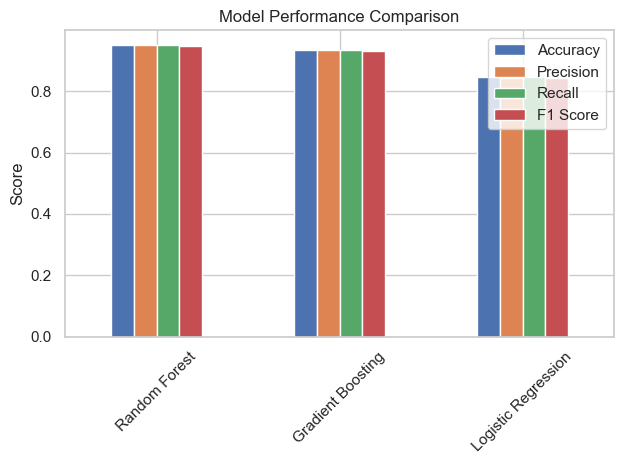

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.950000,0.951438,0.950000,0.948177
Gradient Boosting,0.933333,0.933685,0.933333,0.932473
Logistic Regression,0.845833,0.842378,0.845833,0.842370


In [5]:
results_df = pd.DataFrame(results).T
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)

plt.figure(figsize=(8,5))
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

results_df


## 5. Department-Wise Performance Visualization

In [6]:
# Department-wise performance chart
if 'Department' in df.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(x='Department', y=target, data=df, estimator=np.mean)
    plt.title('Average Employee Performance by Department')
    plt.ylabel('Average Performance Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Department' not found in dataset.")


Column 'Department' not found in dataset.


## 6. Save Best Model

In [ ]:
# Save the best-performing model based on F1 Score
best_model_name = results_df['F1 Score'].idxmax()
best_model = models[best_model_name]
joblib.dump(best_model, os.path.join('inx_outputs', f'{best_model_name}_best_model.pkl'))
print(f"Saved best model: {best_model_name}")
